In [29]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)



import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/test.csv
/kaggle/input/digit-recognizer/train.csv


In [30]:
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs={}):
        if(logs.get('accuracy')>0.96):
            print('\n reached desired accuracy so cancelling training ')
            self.model.stop_training=True
            
            


In [31]:
x_train=pd.read_csv("/kaggle/input/digit-recognizer/train.csv")

In [32]:
label=x_train.label
pixels=x_train.iloc[:,1:]
pixels.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
img=np.array(pixels[0:1]).reshape((28,28))

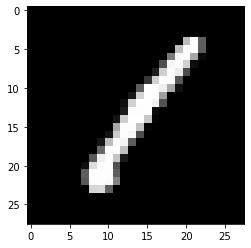

In [34]:
plt.imshow(img, cmap='gray')
plt.show()


In [35]:
# preparing data
y_train=x_train["label"]
x_train=x_train.drop("label",axis=1)


In [36]:
print(x_train.head())
print(y_train.head())


   pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0   

In [37]:
callbacks = myCallback()
model = tf.keras.models.Sequential([
        tf.keras.layers.Flatten(input_shape=(28,28)),
        tf.keras.layers.Dense(512,activation=tf.nn.relu),
        tf.keras.layers.Dense(10,activation=tf.nn.softmax)
        
    ])

In [38]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

#fit model
model.fit(x_train,y_train,epochs=15,callbacks=[callbacks])

Epoch 1/15
1313/1313 [==============================] - 3s 2ms/step - loss: 3.5379 - accuracy: 0.8996
Epoch 2/15
1313/1313 [==============================] - 3s 2ms/step - loss: 0.3868 - accuracy: 0.9396
Epoch 3/15
1313/1313 [==============================] - 3s 2ms/step - loss: 0.3486 - accuracy: 0.9414
Epoch 4/15
1313/1313 [==============================] - 3s 2ms/step - loss: 0.3125 - accuracy: 0.9427
Epoch 5/15
1313/1313 [==============================] - 3s 2ms/step - loss: 0.2990 - accuracy: 0.9466
Epoch 6/15
1313/1313 [==============================] - 3s 2ms/step - loss: 0.2563 - accuracy: 0.9502
Epoch 7/15
1313/1313 [==============================] - 3s 2ms/step - loss: 0.2580 - accuracy: 0.9535
Epoch 8/15
1313/1313 [==============================] - 3s 3ms/step - loss: 0.2389 - accuracy: 0.9575
Epoch 9/15
1313/1313 [==============================] - 3s 2ms/step - loss: 0.2316 - accuracy: 0.9588
Epoch 10/15
1297/1313 [============================>.] - ETA: 0s - loss: 0.1898 - 

In [39]:
x_test=pd.read_csv("/kaggle/input/digit-recognizer/test.csv")
x_test=pd.DataFrame(x_test)

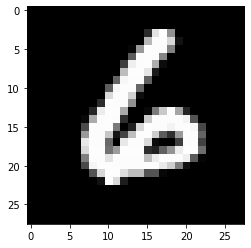

In [40]:
image=np.array(x_test.iloc[34])
image=image.reshape((28,28))
plt.imshow(image, cmap='gray')
plt.show()

In [41]:
prediction=model.predict(x_test)

In [45]:
prediction[34]

array([0.0000000e+00, 0.0000000e+00, 4.3870999e-30, 9.7031071e-37,
       1.6982515e-21, 1.4096744e-27, 1.0000000e+00, 0.0000000e+00,
       5.3792272e-38, 0.0000000e+00], dtype=float32)